In [61]:
import pandas as pd
import visual as vs
import numpy as np
import importlib
import matplotlib.pyplot as plt

importlib.reload(vs)

<module 'visual' from 'D:\\GitHub\\MachineLearning\\capstone\\solutions\\visual.py'>

### 数据探索
来自于Kaggle名为旧金山罪案类型分类的数据集，该数据集分为训练集和测试集，训练集包含878049个带标签样本，测试集包含884262个未带标签样本。  
运行下边代码加载训练集和测试集。

In [2]:
train_data = pd.read_csv('../datasets/train.csv')
test_data = pd.read_csv('../datasets/test.csv')

显示训练集部分样本

In [3]:
train_data.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


显示测试集部分样本

In [4]:
test_data.head(1)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051


In [103]:
categories = train_data['Category'].unique()
categories.sort()

In [104]:
train_data_weekday = pd.DataFrame(index=['Monday', 'Tuesday', 'Thursday', 'Wednesday', 'Friday', 'Saturday', 'Sunday'])
DayOfWeek_Category_Data = train_data[['DayOfWeek', 'Category']]
for cate in categories:
    cnts= DayOfWeek_Category_Data[DayOfWeek_Category_Data['Category']==cate]['DayOfWeek'].value_counts()
    for week in train_data_weekday.index:
        train_data_weekday.loc[week, cate] = cnts[week] if week in cnts else 0

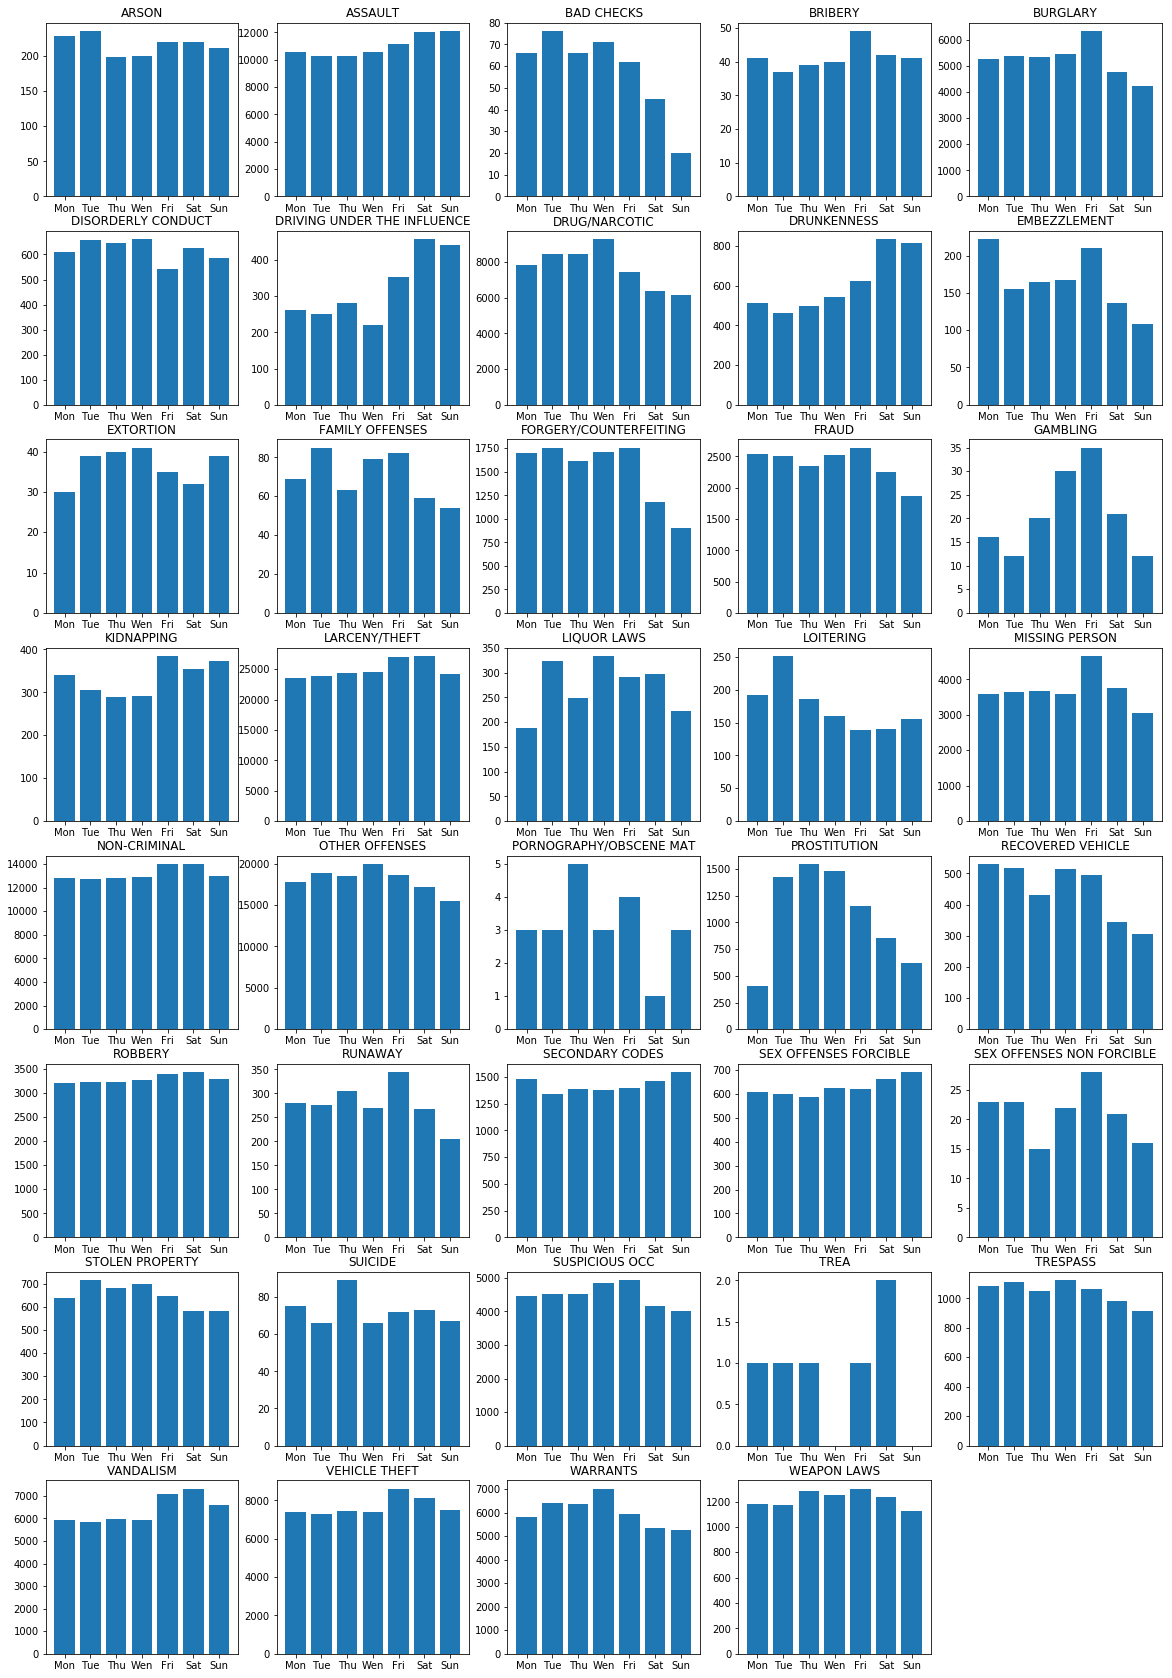

In [105]:
xlables = ['Mon', 'Tue', 'Thu', 'Wen', 'Fri', 'Sat', 'Sun']
cols = 5
nums = len(train_data_weekday.columns)
rows = nums//cols+1

plt.figure(num='weekday_and_category', figsize=(20,30))
for i, cate in enumerate(train_data_weekday.columns):
    plt.subplot(rows,cols, i+1)
    plt.bar(xlables, height=train_data_weekday[cate])
    plt.title(cate)

plt.show()

从图表中可以看出，对于一种罪案类型，每天发生的次数基本持平，对于预测犯罪类型，星期几这个特征可以意义不大。

### 按小时显示案件类型数

In [115]:
train_data_hours = pd.DataFrame(index=range(24))
# index为时间序列的DataFrame
Dates_Category_data = train_data[['Dates', 'Category']]
New_Dates_Category_data = Dates_Category_data.set_index( 
    pd.DatetimeIndex(Dates_Category_data['Dates'].tolist()))
for cate in categories:
    cnts = []
    for t in range(24):
        begin = '{}:00'.format(t)
        end = '{}:00'.format((t+1)%24)
        cnts.append(New_Dates_Category_data[New_Dates_Category_data['Category']==cate].between_time(begin,end,include_end=False).shape[0])
    train_data_hours[cate] = cnts

In [117]:
train_data_hours

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,101,4291,65,16,1365,236,299,1703,372,240,...,23,220,19,2033,0,215,2681,2035,1680,411
1,87,3789,1,9,832,177,272,1043,349,7,...,3,158,22,844,0,153,1832,1392,1205,322
2,100,3454,1,10,879,151,285,808,273,2,...,1,128,14,793,0,147,1819,1116,977,313
3,91,1738,1,7,865,110,118,546,121,2,...,0,101,5,553,0,132,1107,669,694,161
4,98,1052,2,2,772,71,51,379,59,2,...,0,81,4,366,0,98,711,505,567,113
5,61,825,1,4,707,172,26,205,13,2,...,1,68,8,287,1,207,579,498,399,60
6,47,1034,3,3,805,454,34,600,40,2,...,4,73,14,468,1,486,661,741,715,103
7,35,1580,8,4,1272,346,16,1313,66,17,...,2,101,15,793,0,453,932,1268,1337,156
8,33,2573,24,2,2124,265,15,1733,72,89,...,6,130,24,1409,0,419,1395,2002,1591,246
9,30,2847,35,14,1794,207,21,2114,78,94,...,8,160,27,1574,0,401,1295,1868,1839,325


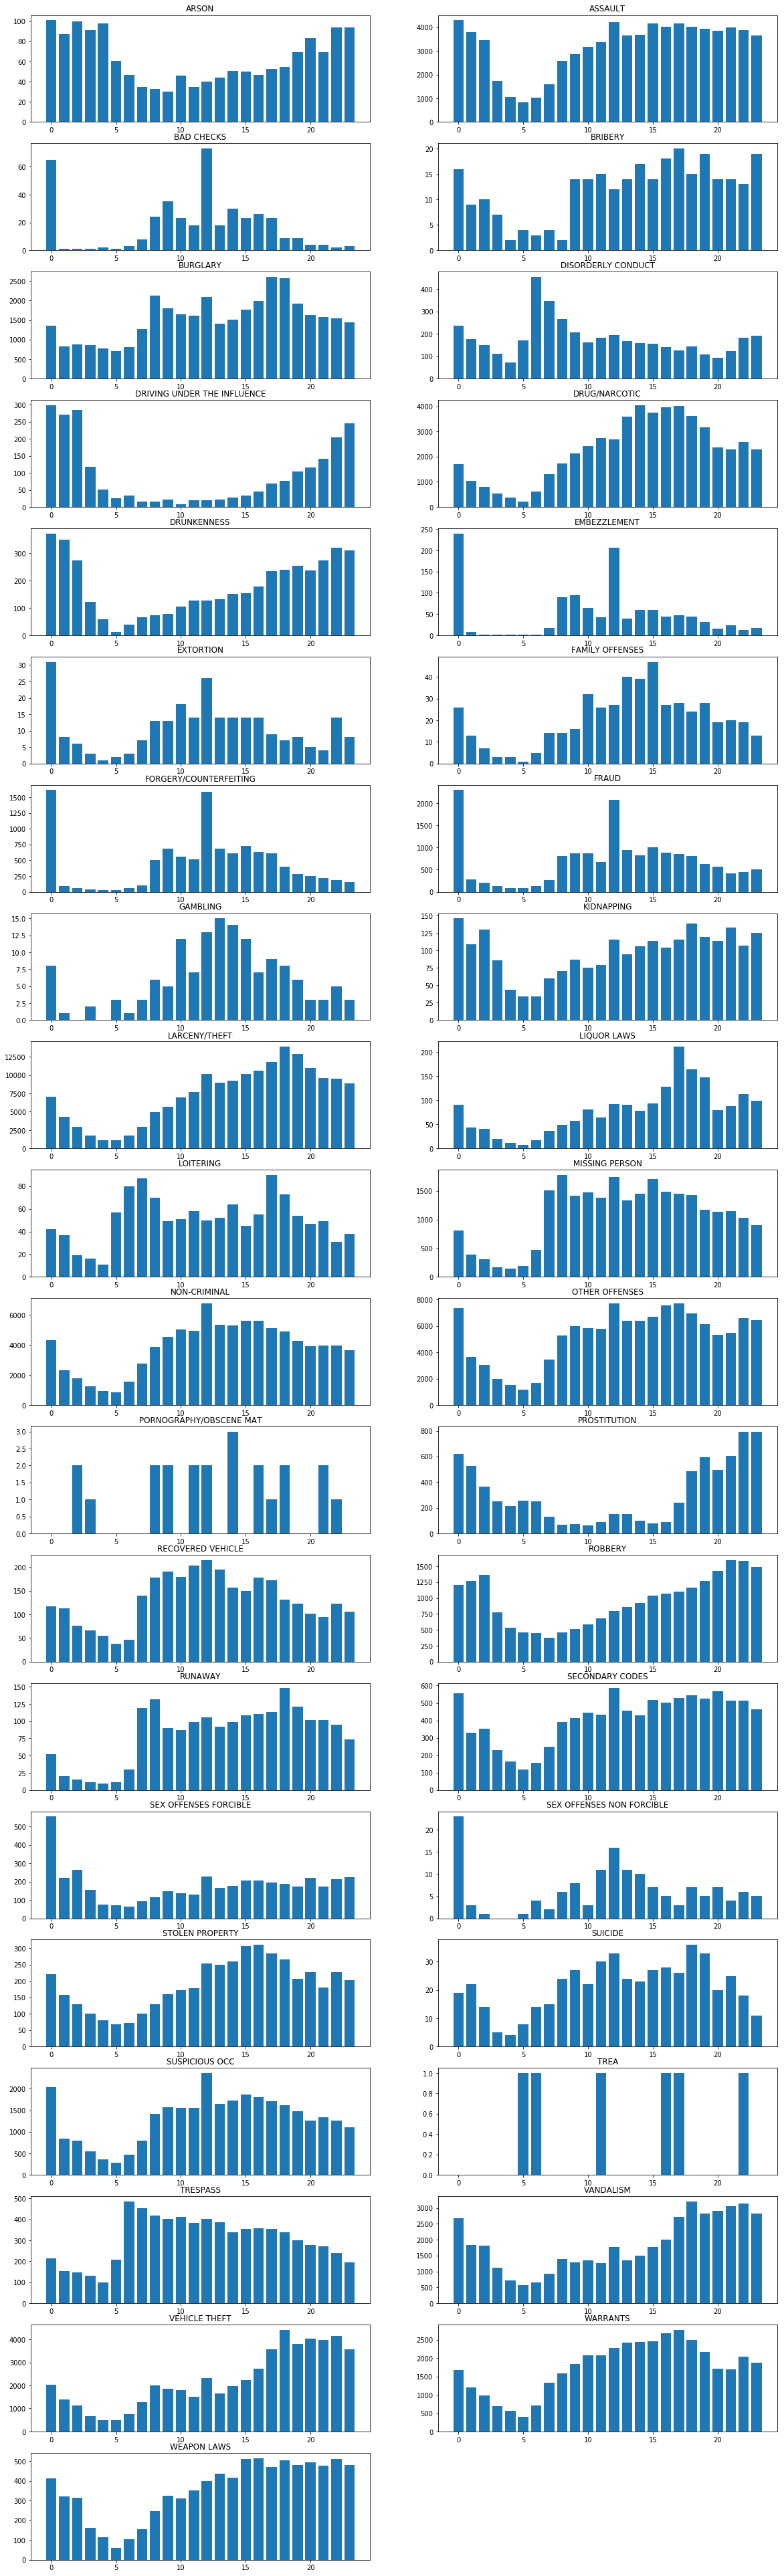

In [118]:
xlables = train_data_hours.index
cols = 2
nums = len(train_data_hours.columns)
rows = nums//cols+1

plt.figure(num='hours_and_category', figsize=(20,70))
for i, cate in enumerate(train_data_hours.columns):
    plt.subplot(rows,cols, i+1)
    plt.bar(xlables, height=train_data_hours[cate])
    plt.title(cate)

plt.show()

In [6]:
# 取出训练集中的预测目标字段
target = train_data['Category']

# 删除无用字段 'Category' 'Descript' 'Resolution'
train_data = train_data.drop(columns=['Category', 'Descript', 'Resolution'])